# Deep Convolutional GAN (DCGAN) Implementation with MNIST Dataset

This notebook implements a Deep Convolutional GAN using convolutional layers for better image generation quality.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 85.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 120.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 119.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.2 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import os
from IPython.display import clear_output

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
print("TensorFlow version:", tf.__version__)
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print("GPU Device:", tf.test.gpu_device_name())


TensorFlow version: 2.19.0
Num GPUs Available: 1
GPU Device: /device:GPU:0


In [ ]:
# Load and preprocess MNIST dataset
(x_train, _), (_, _) = keras.datasets.mnist.load_data()

# Normalize to [-1, 1] range and reshape for conv layers
x_train = (x_train.astype('float32') - 127.5) / 127.5
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)  # Add channel dimension

print(f"Training data shape: {x_train.shape}")
print(f"Data range: [{x_train.min():.2f}, {x_train.max():.2f}]")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training data shape: (60000, 28, 28, 1)
Data range: [-1.00, 1.00]


In [ ]:
# DCGAN Generator Model
def build_dcgan_generator(latent_dim=100):
    model = keras.Sequential([
        # Dense layer to start
        layers.Dense(7 * 7 * 256, input_dim=latent_dim, use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(alpha=0.2),

        # Reshape to 7x7x256
        layers.Reshape((7, 7, 256)),

        # Upsample to 14x14x128
        layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(alpha=0.2),

        # Upsample to 28x28x64
        layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(alpha=0.2),

        # Final layer to 28x28x1
        layers.Conv2DTranspose(1, (5, 5), strides=(1, 1), padding='same', use_bias=False, activation='tanh')
    ], name='dcgan_generator')

    return model

# DCGAN Discriminator Model
def build_dcgan_discriminator():
    model = keras.Sequential([
        # Input 28x28x1
        layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.3),

        # Downsample to 7x7x128
        layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.3),

        # Flatten and output
        layers.Flatten(),
        layers.Dense(1, activation='sigmoid')
    ], name='dcgan_discriminator')

    return model

In [ ]:
# Build and compile models
latent_dim = 100

# Build generator and discriminator
generator = build_dcgan_generator(latent_dim)
discriminator = build_dcgan_discriminator()

# Compile discriminator
discriminator.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Build and compile DCGAN
discriminator.trainable = False
gan_input = keras.Input(shape=(latent_dim,))
generated_img = generator(gan_input)
gan_output = discriminator(generated_img)
dcgan = keras.Model(gan_input, gan_output, name='dcgan')

dcgan.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
    loss='binary_crossentropy'
)

print("DCGAN Generator Summary:")
generator.summary()
print("\nDCGAN Discriminator Summary:")
discriminator.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


DCGAN Generator Summary:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "dcgan_generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12544)          │     1,254,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 12544)          │        50,176 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 14, 14, 128)    │       819,200 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 28, 28, 64)     │       204,800 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 28, 28, 1)      │         1,600 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,330,944 (8.89 MB)

 Trainable params: 2,305,472 (8.79 MB)

 Non-trainable params: 25,472 (99.50 KB)


DCGAN Discriminator Summary:


Model: "dcgan_discriminator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 14, 14, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         6,273 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 212,865 (831.50 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 212,865 (831.50 KB)

In [ ]:
# Training functions
def generate_and_save_dcgan_images(generator, epoch, test_input, save_dir='dcgan_images'):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    predictions = generator(test_input, training=False)
    predictions = predictions.numpy()

    fig = plt.figure(figsize=(10, 10))
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i, :, :, 0], cmap='gray')
        plt.axis('off')

    plt.suptitle(f'DCGAN Generated Images - Epoch {epoch}')
    plt.tight_layout()
    plt.savefig(f'{save_dir}/dcgan_epoch_{epoch}.png')
    plt.show()

def train_dcgan(generator, discriminator, dcgan, dataset, epochs=50, batch_size=128):
    # Create directory for saving models
    if not os.path.exists('dcgan_models'):
        os.makedirs('dcgan_models')

    # Fixed noise for consistent image generation
    fixed_noise = tf.random.normal([16, latent_dim])

    # Training history
    d_losses = []
    g_losses = []

    for epoch in range(epochs):
        epoch_d_loss = []
        epoch_g_loss = []

        # Create batches
        num_batches = len(dataset) // batch_size

        for batch_idx in range(num_batches):
            # Get real images
            start_idx = batch_idx * batch_size
            end_idx = start_idx + batch_size
            real_images = dataset[start_idx:end_idx]

            # Generate fake images
            noise = tf.random.normal([batch_size, latent_dim])
            fake_images = generator(noise, training=True)

            # Train discriminator
            discriminator.trainable = True

            # Real images
            d_loss_real = discriminator.train_on_batch(real_images, np.ones((batch_size, 1)))
            # Fake images
            d_loss_fake = discriminator.train_on_batch(fake_images, np.zeros((batch_size, 1)))
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # Train generator
            discriminator.trainable = False
            noise = tf.random.normal([batch_size, latent_dim])
            g_loss = dcgan.train_on_batch(noise, np.ones((batch_size, 1)))

            epoch_d_loss.append(d_loss[0])
            epoch_g_loss.append(g_loss)

        # Record losses
        d_losses.append(np.mean(epoch_d_loss))
        g_losses.append(np.mean(epoch_g_loss))

        # Print progress and generate images
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch+1}/{epochs}")
            print(f"Discriminator Loss: {d_losses[-1]:.4f}")
            print(f"Generator Loss: {g_losses[-1]:.4f}")
            print("-" * 50)

            generate_and_save_dcgan_images(generator, epoch+1, fixed_noise)

            # Save models
            generator.save(f'dcgan_models/generator_epoch_{epoch+1}.h5')
            discriminator.save(f'dcgan_models/discriminator_epoch_{epoch+1}.h5')

    return d_losses, g_losses

Starting DCGAN training...
Epoch 10/50
Discriminator Loss: 0.6913
Generator Loss: 0.7062
--------------------------------------------------


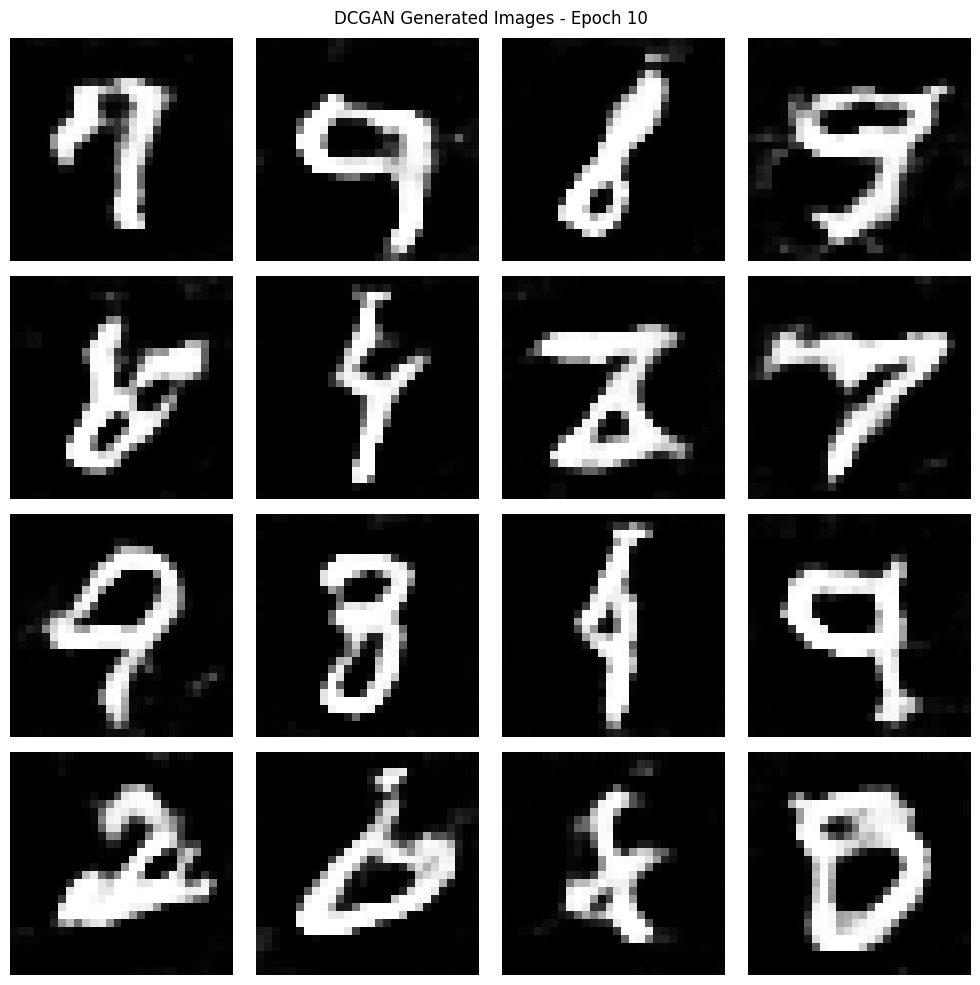

Epoch 20/50
Discriminator Loss: 0.6904
Generator Loss: 0.7127
--------------------------------------------------


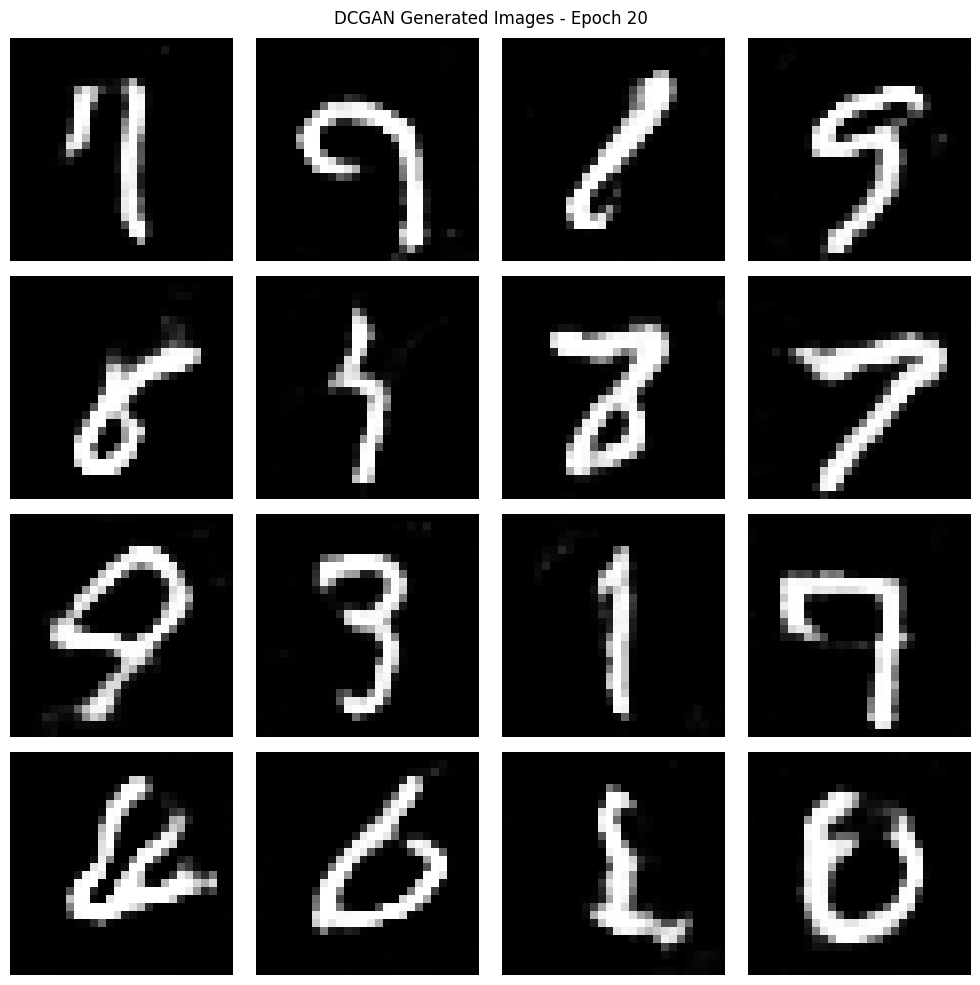

Epoch 30/50
Discriminator Loss: 0.6907
Generator Loss: 0.7131
--------------------------------------------------


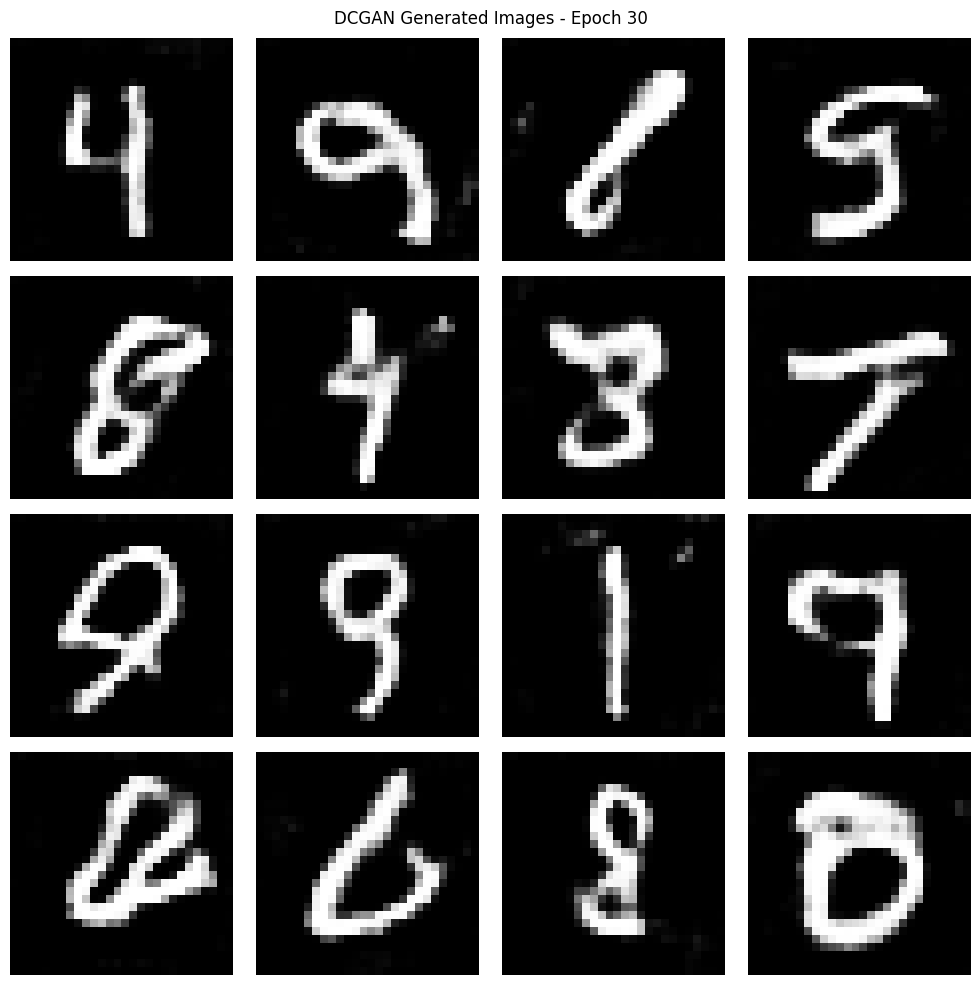

Epoch 40/50
Discriminator Loss: 0.6908
Generator Loss: 0.7130
--------------------------------------------------


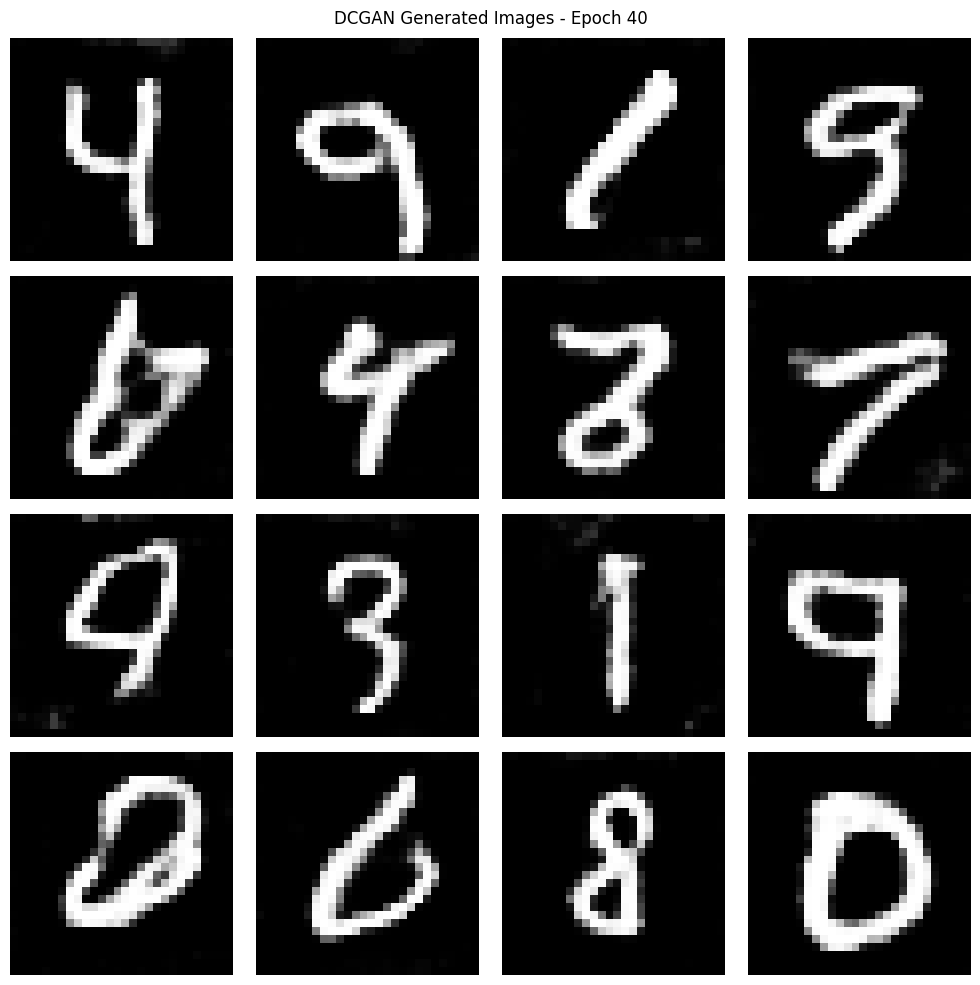

Epoch 50/50
Discriminator Loss: 0.6909
Generator Loss: 0.7131
--------------------------------------------------


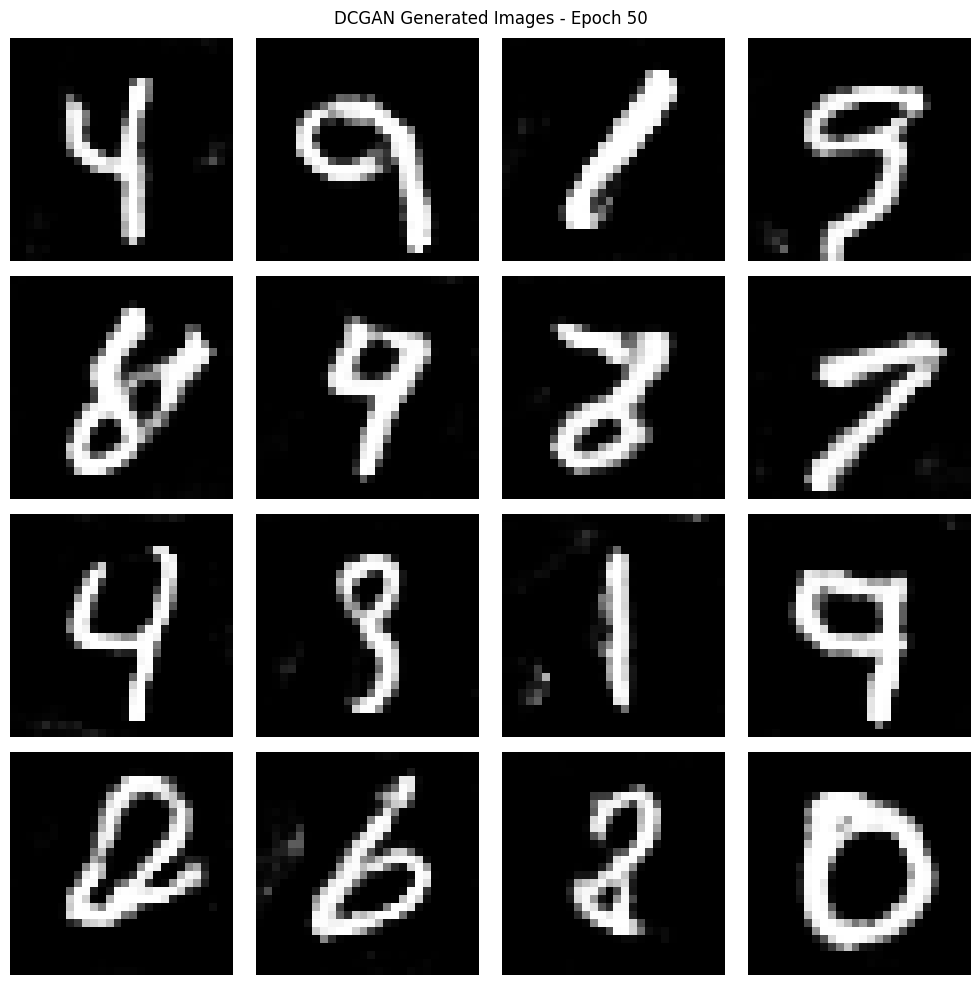

Training completed!


In [ ]:
# Train the DCGAN
print("Starting DCGAN training...")
d_losses, g_losses = train_dcgan(generator, discriminator, dcgan, x_train, epochs=50, batch_size=128)

print("Training completed!")

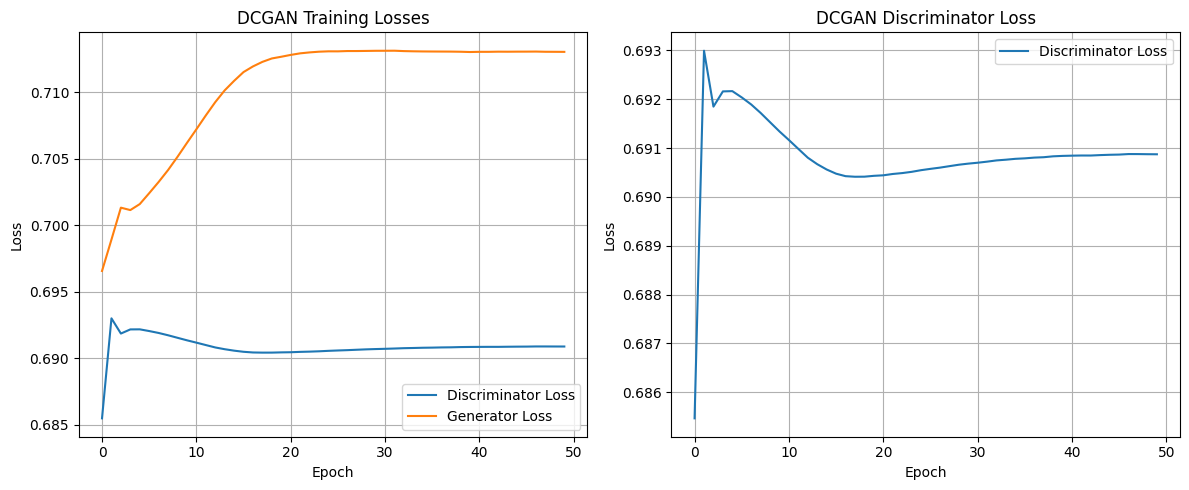

In [ ]:
# Plot training losses
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(d_losses, label='Discriminator Loss')
plt.plot(g_losses, label='Generator Loss')
plt.title('DCGAN Training Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(d_losses, label='Discriminator Loss')
plt.title('DCGAN Discriminator Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('dcgan_training_losses.png')
plt.show()

Generating final high-quality images...


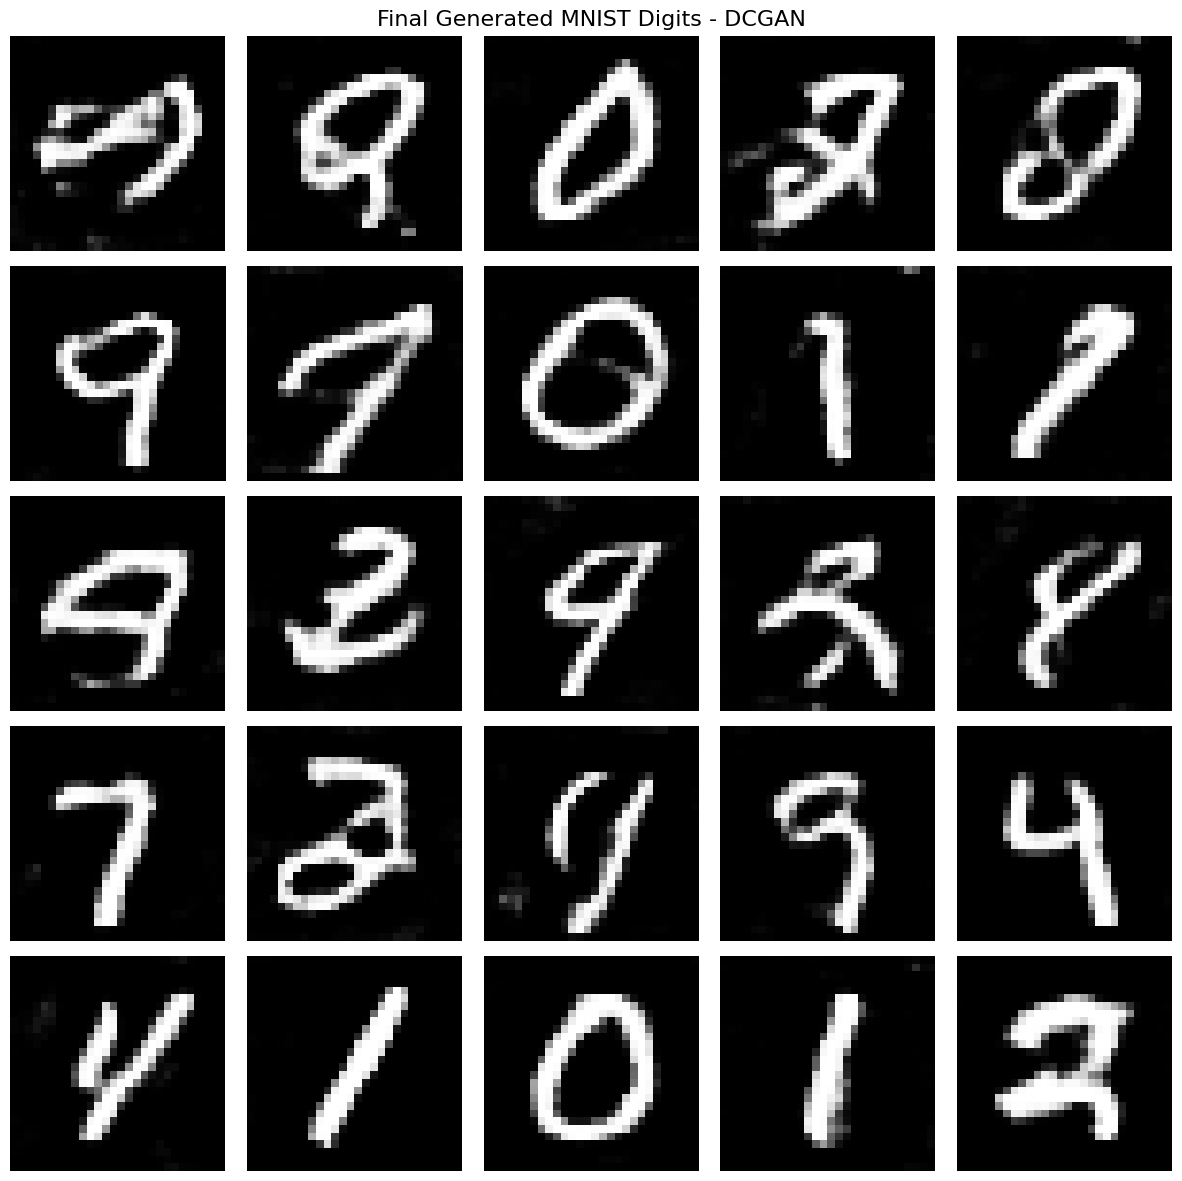

In [ ]:
# Generate high-quality final images
print("Generating final high-quality images...")
test_noise = tf.random.normal([25, latent_dim])
generated_images = generator(test_noise, training=False)
generated_images = generated_images.numpy()

plt.figure(figsize=(12, 12))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(generated_images[i, :, :, 0], cmap='gray')
    plt.axis('off')

plt.suptitle('Final Generated MNIST Digits - DCGAN', fontsize=16)
plt.tight_layout()
plt.savefig('dcgan_final_results.png')
plt.show()

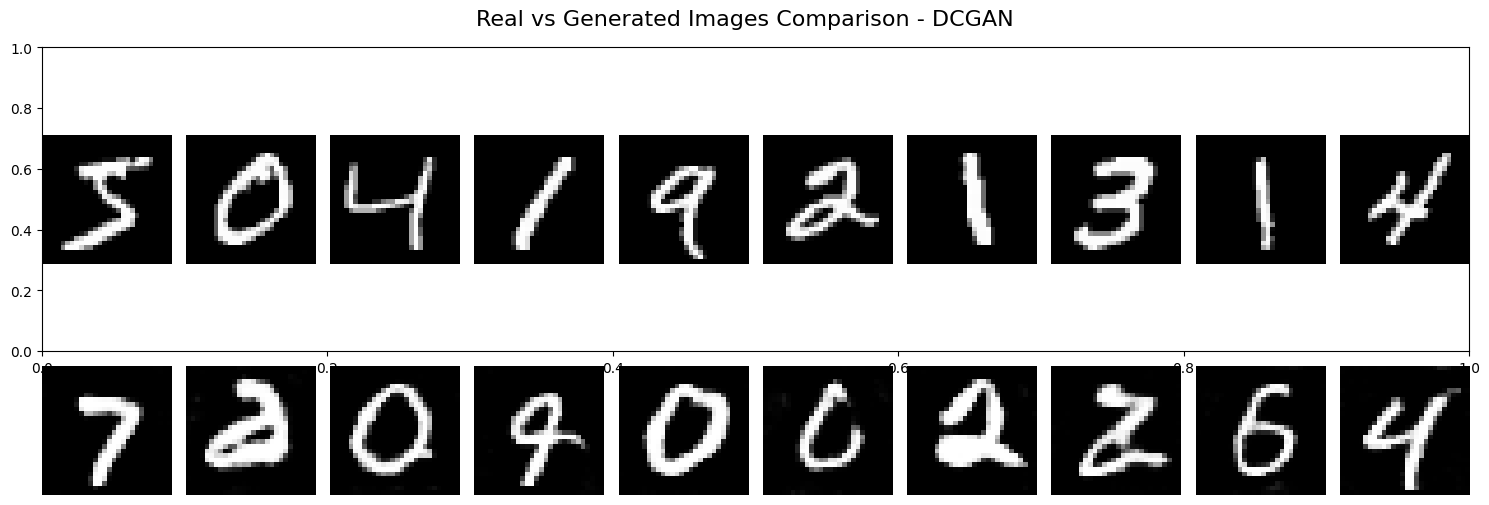

In [ ]:
# Compare with real images
plt.figure(figsize=(15, 6))

# Real images
plt.subplot(2, 1, 1)
real_samples = x_train[:10]
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(real_samples[i, :, :, 0], cmap='gray')
    plt.axis('off')
    if i == 0:
        plt.ylabel('Real Images', fontsize=12)

# Generated images
generated_samples = generator(tf.random.normal([10, latent_dim]), training=False)
for i in range(10):
    plt.subplot(2, 10, i+11)
    plt.imshow(generated_samples[i, :, :, 0], cmap='gray')
    plt.axis('off')
    if i == 0:
        plt.ylabel('Generated Images', fontsize=12)

plt.suptitle('Real vs Generated Images Comparison - DCGAN', fontsize=16)
plt.tight_layout()
plt.savefig('dcgan_real_vs_generated.png')
plt.show()

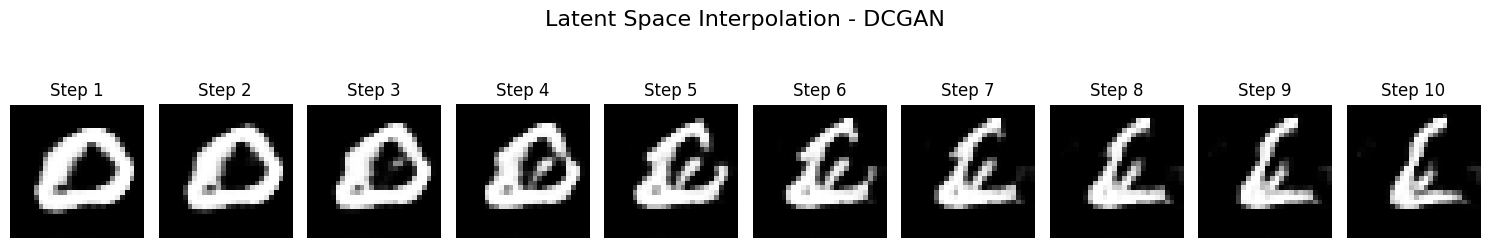

In [ ]:
# Latent space interpolation
def interpolate_latent_space(generator, start_noise, end_noise, steps=10):
    """Interpolate between two points in latent space"""
    interpolated_images = []

    for i in range(steps):
        alpha = i / (steps - 1)
        interpolated_noise = (1 - alpha) * start_noise + alpha * end_noise
        generated = generator(interpolated_noise, training=False)
        interpolated_images.append(generated[0, :, :, 0])

    return interpolated_images

# Generate interpolation
start_point = tf.random.normal([1, latent_dim])
end_point = tf.random.normal([1, latent_dim])
interpolated = interpolate_latent_space(generator, start_point, end_point, 10)

plt.figure(figsize=(15, 3))
for i, img in enumerate(interpolated):
    plt.subplot(1, 10, i+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f'Step {i+1}')

plt.suptitle('Latent Space Interpolation - DCGAN', fontsize=16)
plt.tight_layout()
plt.savefig('dcgan_latent_interpolation.png')
plt.show()

In [ ]:
# Save final models
generator.save('dcgan_models/final_dcgan_generator.h5')
discriminator.save('dcgan_models/final_dcgan_discriminator.h5')
dcgan.save('dcgan_models/final_dcgan.h5')

print("DCGAN models saved successfully!")
print("\nFiles created:")
print("- DCGAN Generator models in 'dcgan_models/' directory")
print("- Generated images in 'dcgan_images/' directory")
print("- Training loss plots saved as 'dcgan_training_losses.png'")
print("- Final results saved as 'dcgan_final_results.png'")
print("- Real vs Generated comparison saved as 'dcgan_real_vs_generated.png'")
print("- Latent space interpolation saved as 'dcgan_latent_interpolation.png'")

DCGAN models saved successfully!

Files created:
- DCGAN Generator models in 'dcgan_models/' directory
- Generated images in 'dcgan_images/' directory
- Training loss plots saved as 'dcgan_training_losses.png'
- Final results saved as 'dcgan_final_results.png'
- Real vs Generated comparison saved as 'dcgan_real_vs_generated.png'
- Latent space interpolation saved as 'dcgan_latent_interpolation.png'


In [ ]:
import shutil
from google.colab import files

# Name of the output zip file
output_filename = "/content/dcgan_results"

# Create zip containing folders + PNG files
shutil.make_archive(output_filename, 'zip', "/content")

# Download the zip
files.download(output_filename + ".zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>